Load data

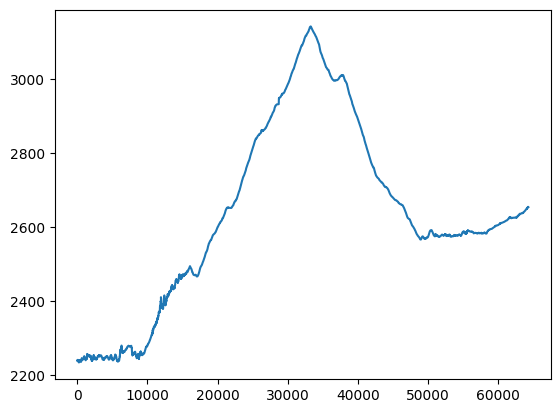

      secuencia       height          utm_x         utm_y     next_utm_x  \
0         11795  2239.533203  485256.944400  2.152624e+06  485256.734405   
1         11796  2239.547363  485256.734405  2.152624e+06  485255.998744   
2         11797  2239.797363  485255.998744  2.152622e+06  485254.738230   
3         11798  2240.242188  485254.738230  2.152621e+06  485253.792121   
4         11799  2240.644531  485253.792121  2.152619e+06  485252.950422   
...         ...          ...            ...           ...            ...   
6027      17822  2655.105469  433618.419221  2.131161e+06  433618.209057   
6028      17823  2655.105225  433618.209057  2.131161e+06  433617.473079   
6029      17824  2655.092529  433617.473079  2.131161e+06  433616.421051   
6030      17825  2655.127441  433616.421051  2.131161e+06  433615.475312   
6031      17826  2655.086670  433615.475312  2.131161e+06            NaN   

        next_utm_y  next_height  distance     slope  sum_distance  
0     2.152624e+06 

In [2]:
#add libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utm
import time as time
start = time.time()
#add data
datos = pd.read_csv("datasets/Viajes MEX-TOL.csv")
#convert to utm
latitudes = np.array(datos["latitud"])
longitudes = np.array(datos["longitud"])
utms = utm.from_latlon(latitudes,longitudes,14,"Q") #14Q for Mexico
datos_f = datos.copy()
datos_f["utm_x"] = utms[0]
datos_f["utm_y"] = utms[1]
datos_f = datos_f.drop(["l","latitud","longitud","fecha","hora"],axis=1)
datos_f = datos_f.rename(columns={"altitud": "height"})
#lag point coordinates
datos_l = datos_f.copy()
datos_l["next_utm_x"] = datos_f["utm_x"].shift(-1)
datos_l["next_utm_y"] = datos_f["utm_y"].shift(-1)
datos_l["next_height"] = datos_f["height"].shift(-1)
#calculate distances and slopes
datos_l["distance"] = np.sqrt((datos_l["utm_x"]-datos_l["next_utm_x"])**2 + (datos_l["utm_y"]-datos_l["next_utm_y"])**2)
datos_l["slope"] = (datos_l["next_height"]-datos_l["height"])/datos_l["distance"] 
datos_l["sum_distance"] = np.cumsum(datos_l["distance"])
plt.plot(datos_l["sum_distance"],datos_l["height"])
plt.show()    
print(datos_l)
stop = time.time()
print(stop-start,"ms")

Clustering

In [3]:
import seaborn as sns

In [4]:

heights = datos_l["height"]
clusters = np.ones(len(heights))
sdd_cluster=1
dist = 0
tol = 2
for i in range(1,len(heights)):
    dist = abs(heights[i-1]-heights[i])
    if dist>tol:
        sdd_cluster = sdd_cluster+1
        clusters[i] = sdd_cluster  

datos_l["cluster"] = clusters
#datos_l["cluster"] = clustering(datos_l["height"],1.5)
datos_l["cluster"] = pd.Categorical(datos_l["cluster"])



In [5]:
sns.catplot(data=datos_l, x="sum_distance", y="height")

KeyboardInterrupt: 